In [3]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [4]:
#importing the dataset

data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# checking the no of rows and columns

data.shape

(614, 13)

The dataset has 614 rows and 13 columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset has null values in certain columns and only columns being numerical 

In [8]:
#checking the columns having null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The above have the respective null values.

In [18]:
# creating a dataset having only columns from index 6 to 10 which are numerical.
data_hist = data.iloc[:,6:11]

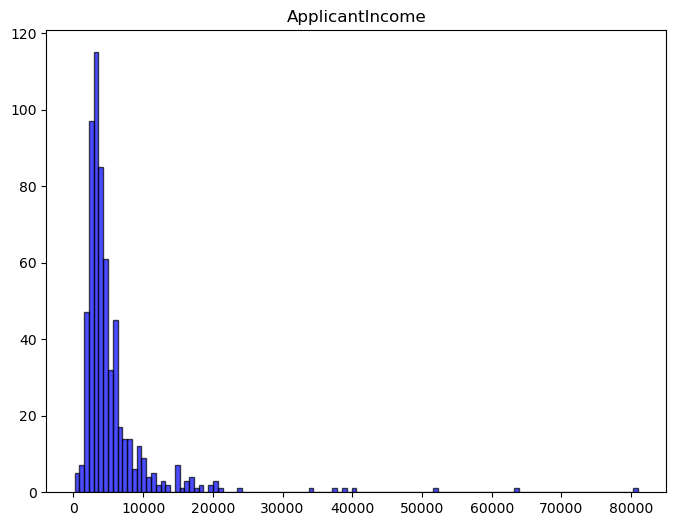

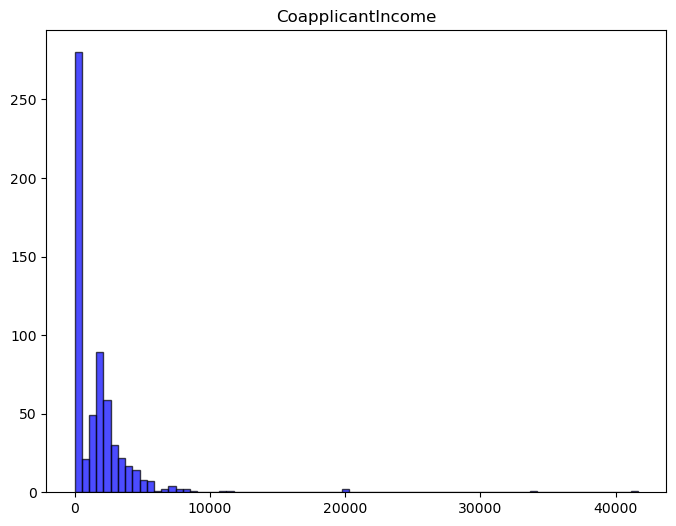

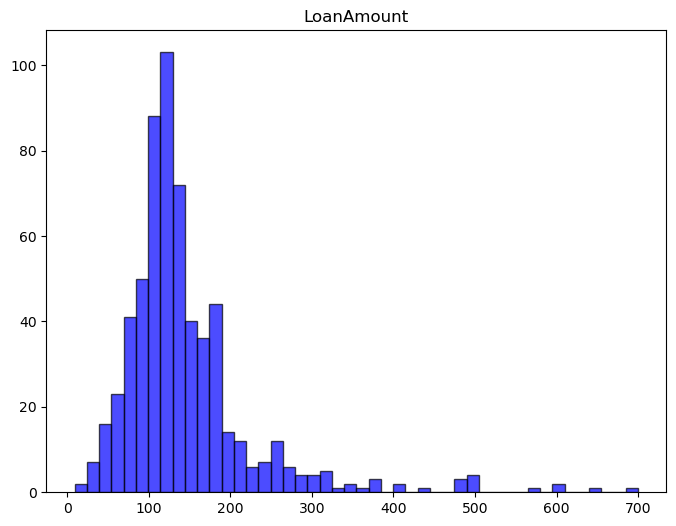

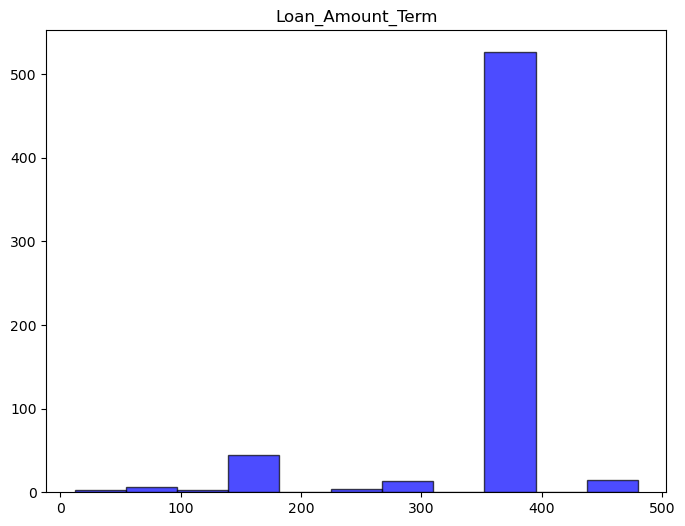

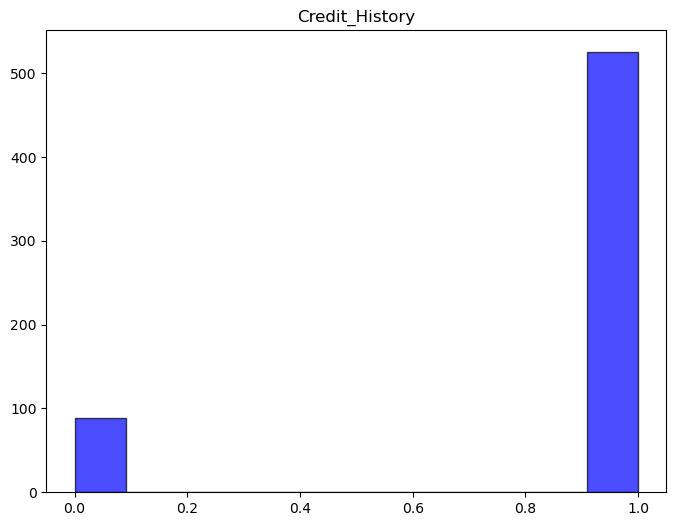

In [19]:
# checking the distribution of the data in the numerical features

#using for loop to iterate on the columns of the dataset
for column in data_hist.columns:
    plt.figure(figsize=(8, 6))
    
    # going through each and every feature
    plt.hist(data_hist[column], bins='auto', color='blue', edgecolor='black', alpha=0.7)
    plt.title(column)

From the above histograms we can see that applicanIncome, CoapplicantIncome and LoanAmount are right skewed. So they have to treated with log transformation to make them normally distributed

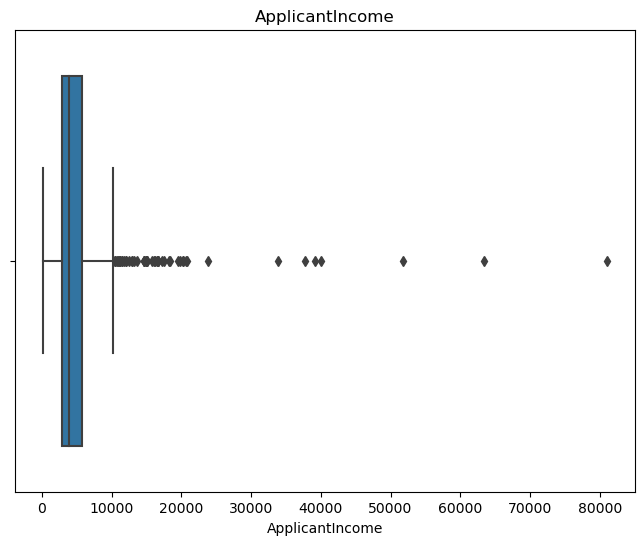

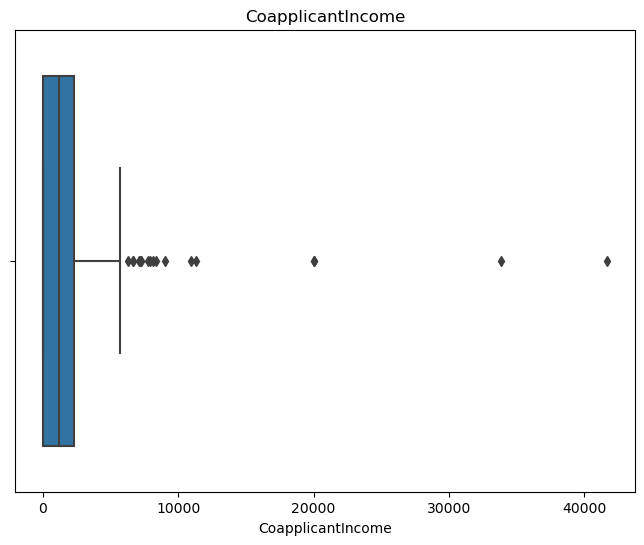

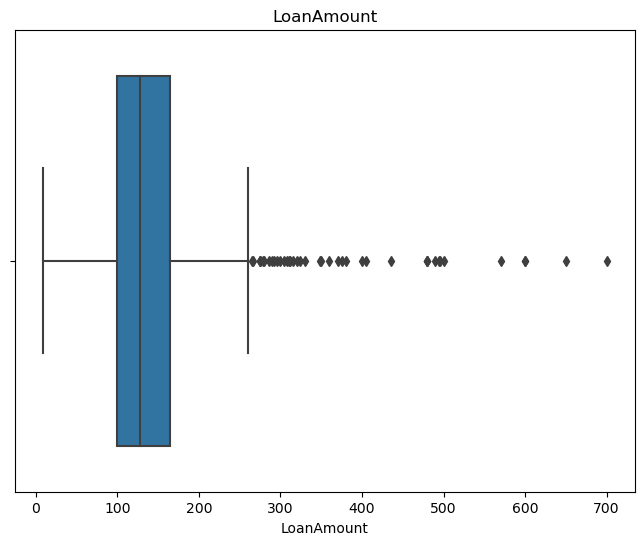

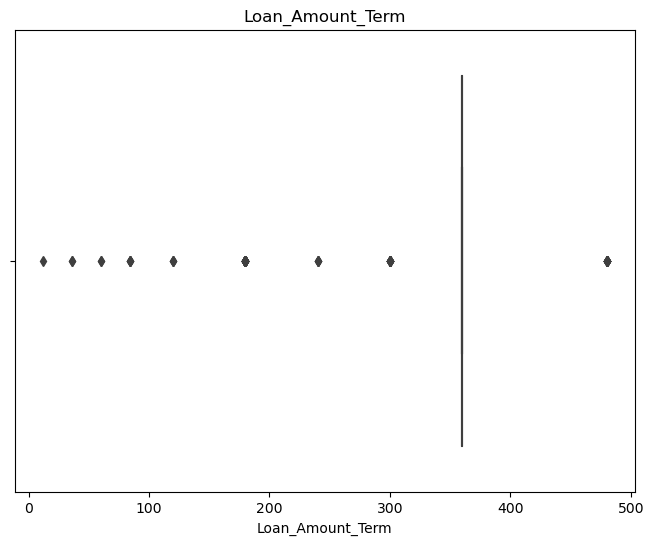

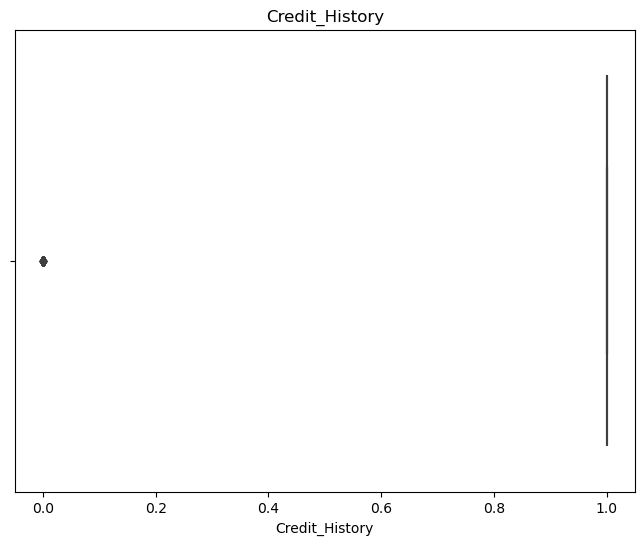

In [20]:
# checking for outliers in the above columns 

#using for loop to iterate on the columns of the dataset
for column in data_hist.columns:
    plt.figure(figsize=(8, 6))
    
    # going through each and every feature
    sns.boxplot(data = data_hist, x= column)
    plt.title(column)

The applicantIncome, coapplicantIncome and LoanAmount have huge outliers, as we can see them after the max range.

In [21]:
# treating the null or missing values using mean, median or mode which is suitable

data.Gender.fillna(data.Gender.mode()[0], inplace=True)

data.Married.fillna(data.Married.mode()[0], inplace=True)

data.Dependents.fillna(data.Dependents.mode()[0], inplace=True)

data.Self_Employed.fillna(data.Self_Employed.mode()[0], inplace=True)

data.LoanAmount.fillna(data.LoanAmount.median(), inplace=True)

data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(), inplace=True)

data.Credit_History.fillna(data.Credit_History.mode()[0], inplace=True)

In [22]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
total_income         0
total_income_log     0
Loan_amount_log      0
dtype: int64

In [23]:
# combining the ApplicantIncome and CoapplicantIncome from the data into a totalincome column

data['total_income'] = data.ApplicantIncome + data.CoapplicantIncome



In [24]:
# normalising the total_income feature by performing the log transformations

data['total_income_log'] = np.log(data.total_income)

data['Loan_amount_log'] = np.log(data.LoanAmount)

In [16]:
data['Loan_amount_log'] = np.log(data.LoanAmount)

In [25]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,total_income_log,Loan_amount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674026,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,7.972466,4.262680
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,8.320205,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,9.025456,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,8.933664,5.231109


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  total_income       614 non-null    float64
 14  total_income_log   614 non-null    float64
 15  Loan_amount_log    614 non-null    float64
dtypes: float64(7), int64(1), o

In [26]:
# splitting the data into independent and dependent features 

x = data.iloc[:,np.r_[1:5,9:11,13:15]].values
y = data.iloc[:,12].values

In [27]:
x

array([['Male', 'No', '0', ..., 1.0, 5849.0, 8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 6091.0, 8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 8312.0, 9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 7583.0, 8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4583.0, 8.430109084509125]],
      dtype=object)

In [31]:
# splitting the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [32]:
le_x = LabelEncoder()

In [33]:
# encoding the training variables 
for i in range(0,5):
    x_train[:,i] = le_x.fit_transform(x_train[:,i])

In [34]:
x_train[:,7] = le_x.fit_transform(x_train[:,7])

In [35]:
le_y =  LabelEncoder()

In [36]:
y_train = le_y.fit_transform(y_train)

In [37]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
# encoding the testing dataset

In [38]:
for i in range(0,5):
    x_test[:,i] = le_x.fit_transform(x_test[:,i])

In [39]:
x_test[:,7] = le_x.fit_transform(x_test[:,7])

In [40]:
y_test = le_y.fit_transform(y_test)

In [42]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 7085.0, 85],
       [0, 0, 0, 0, 5, 1.0, 4230.0, 28],
       [1, 1, 0, 0, 5, 1.0, 10039.0, 104],
       [1, 1, 0, 0, 5, 1.0, 6784.0, 80],
       [1, 1, 2, 0, 5, 1.0, 3875.0, 22],
       [1, 1, 0, 1, 3, 0.0, 6058.0, 70],
       [1, 1, 3, 0, 3, 1.0, 6417.0, 77],
       [1, 0, 0, 0, 5, 1.0, 12876.0, 114],
       [1, 0, 0, 0, 5, 0.0, 5124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 5233.0, 55],
       [0, 0, 0, 0, 5, 1.0, 2917.0, 4],
       [1, 1, 1, 0, 5, 1.0, 2895.0, 2],
       [0, 0, 0, 0, 5, 1.0, 8333.0, 96],
       [1, 1, 2, 0, 5, 1.0, 8667.0, 97],
       [1, 1, 0, 0, 5, 1.0, 14880.0, 117],
       [1, 1, 1, 0, 5, 1.0, 3875.0, 22],
       [1, 0, 1, 1, 5, 1.0, 4311.0, 32],
       [1, 0, 0, 1, 5, 1.0, 3946.0, 25],
       [0, 0, 0, 0, 5, 1.0, 2500.0, 1],
       [1, 1, 0, 1, 5, 0.0, 4787.0, 44],
       [0, 1, 0, 0, 5, 0.0, 6085.0, 71],
       [1, 1, 0, 0, 5, 1.0, 4765.0, 43],
       [1, 1, 2, 0, 5, 1.0, 7550.0, 91],
       [1, 1, 2, 0, 5, 1.0, 11500.0, 111],
       [1, 

In [43]:
scaler = StandardScaler()

In [44]:
# standardizing the values in the testing and training dataset!

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [45]:
x_train

array([[ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
        -0.18578759,  0.29186348],
       [ 0.47374983, -1.40561644,  0.22549137, ...,  0.41790088,
         0.59265746,  1.36113256],
       [ 0.47374983,  0.71143163, -0.76304669, ..., -2.39291191,
        -0.21134115,  0.15438603],
       ...,
       [ 0.47374983,  0.71143163,  2.2025675 , ...,  0.41790088,
         0.17167345,  1.02507656],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
        -0.16052278,  0.3376893 ],
       [-2.11081869,  0.71143163, -0.76304669, ...,  0.41790088,
        -0.095123  ,  0.55154312]])

#### model 

##### 1 - Logisctic Regression

In [46]:
lrmodel = LogisticRegression()

In [72]:
lrmodel.fit(x_train, y_train)

LogisticRegression()

In [73]:
y_pred = lrmodel.predict(x_test)

In [74]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [75]:
metrics.accuracy_score(y_pred, y_test)

0.8292682926829268

##### 2 - Decision Tree

In [51]:
dmodel = DecisionTreeClassifier()

In [52]:
dmodel.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
y_pred1 = dmodel.predict(x_test)

In [54]:
metrics.accuracy_score(y_pred1, y_test)

0.6016260162601627

##### 3 - RandomForest

In [55]:
rmodel = RandomForestClassifier()


In [56]:
rmodel.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
pred2 = rmodel.predict(x_test)

In [58]:
metrics.accuracy_score(pred2, y_test)

0.7560975609756098

#### 4 - SVM

In [59]:
smodel = SVC()

In [60]:
smodel.fit(x_train, y_train)

SVC()

In [61]:
pred3 = smodel.predict(x_test)

In [62]:
metrics.accuracy_score(pred3, y_test)

0.8292682926829268

#### HyperParameter Tuning

In [67]:
# Checking for the best parameters by performing hyper parameter tuning

best_model = {
    'Logistic Regression' : {
        'model' : LogisticRegression(),
        'parameter' : {
            'C':[10,20]
        }
    },
    
    'Decision Tree' : {
        'model' : DecisionTreeClassifier(),
        'parameter' : {
            'criterion' : ["gini", "entropy"]
        }
    },
    
    'Random Forest' : {
        'model' : RandomForestClassifier(),
        'parameter' : {
            'n_estimators' : [1,5,10]
        }
    },
    
    'Support Vector Machine' : {
        'model' : SVC(),
        'parameter' : {
            'kernel' : ['linear', 'poly', 'rbf']
        }
        
    }
}

In [68]:
# USING GRIDSEARCHCV TO PERFORM HYPER PARAMETER TUNING

# GRIDSEARCHCV PERFORMS THE K-CROSS FOLD CROSS VALIDATION INTERNALLY AND PRINTS THE OUTPUT

# an empty list to store the scores of each model
score=[]

# takes the model_name and model from the above list
for model_name, mp in best_model.items():
    
    # performs gridsearch with model as the parameter and cross validation of 5
    cv = GridSearchCV(mp['model'],mp['parameter'], cv=5, return_train_score=False)
    
    # training the data
    cv.fit(x_train,y_train)
    
    # appending the scores to the score list
    score.append({
        'model':model_name,
        'score':cv.best_score_,
        'parameter':cv.best_params_
    })

In [70]:
# printing the models performance along with the best suited parameters

score

[{'model': 'Logistic Regression',
  'score': 0.8024118738404453,
  'parameter': {'C': 10}},
 {'model': 'Decision Tree',
  'score': 0.7087816944959802,
  'parameter': {'criterion': 'entropy'}},
 {'model': 'Random Forest',
  'score': 0.7494124922696351,
  'parameter': {'n_estimators': 10}},
 {'model': 'Support Vector Machine',
  'score': 0.8044320758606472,
  'parameter': {'kernel': 'linear'}}]

### Here Logistic Regression is giving us the best accuracy score with the default parameters. 

### But when hyperparameter tuning is initialized SVM model is providing us with the best performance with kernel as linear!